In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("data_sets/lab_3_data.csv")
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


dimension reduction, save time and money doing less work downstream, also better for pipeline maintanence (less things go adrift)

In [4]:
# check out correlations bewteen columns, focusing only on one, mean
mean_cols = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave_points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

mean_cols.append('diagnosis')

mean_data = data[mean_cols]
print(mean_data.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'],
      dtype='object')


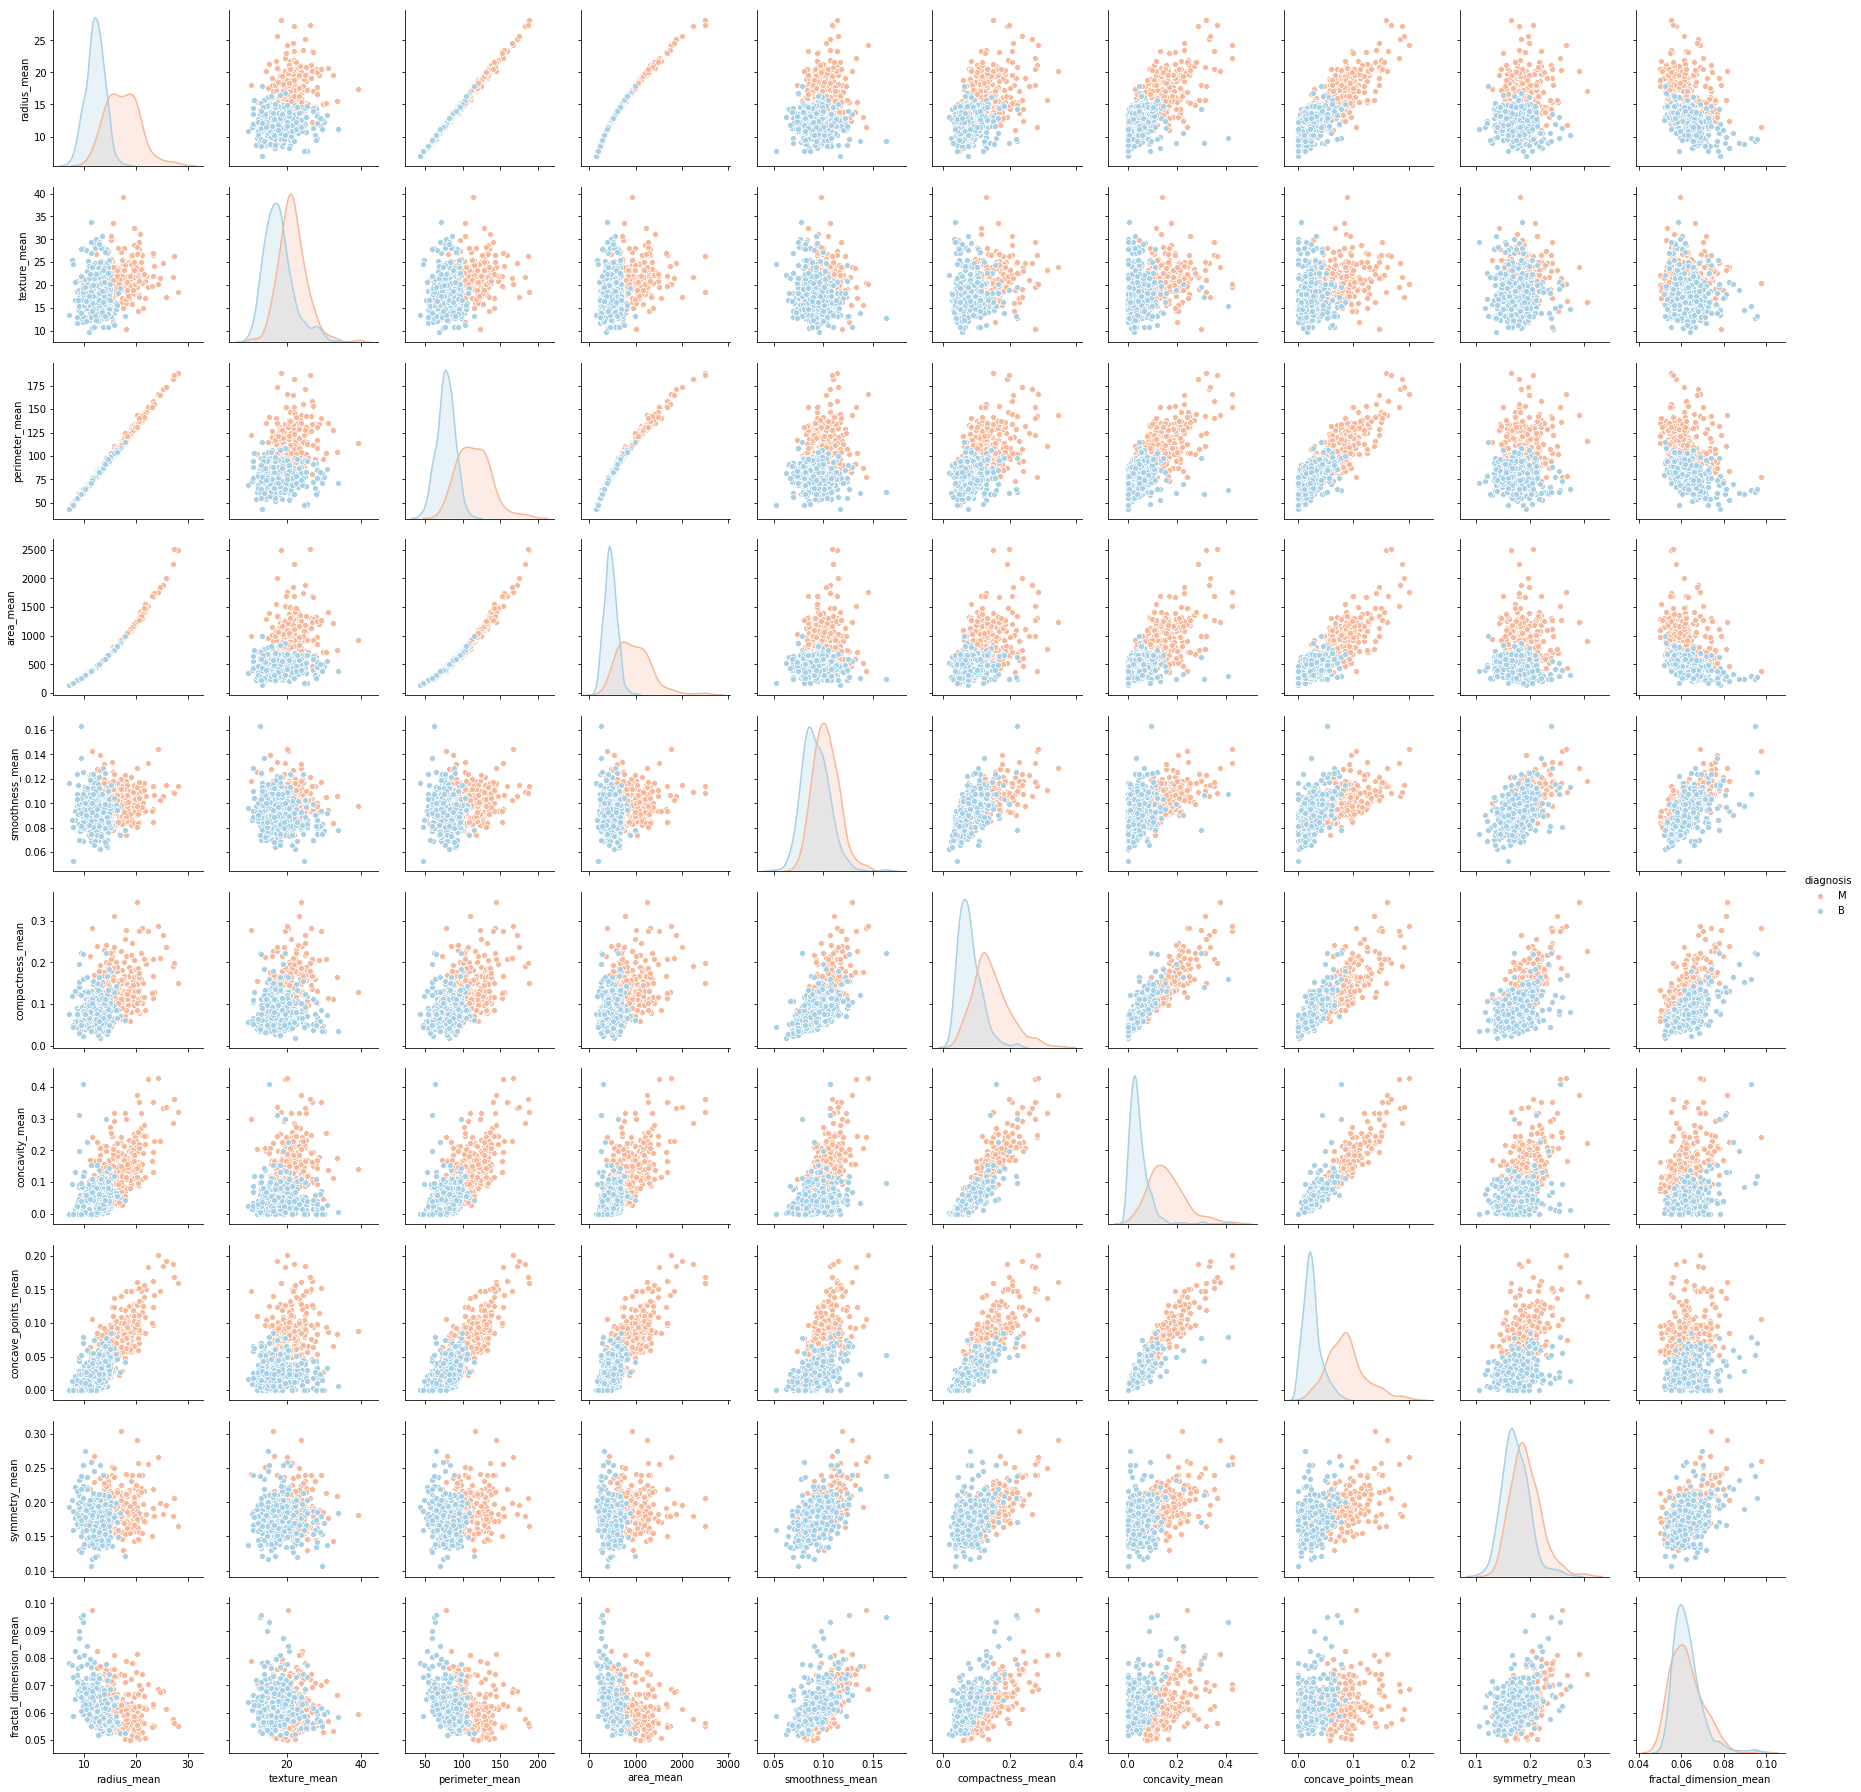

In [5]:
sns.pairplot(data=mean_data, hue='diagnosis', palette='RdBu')

notes on what we see, extreme corr between size, good corr between concavity, concave_points and compactness
choose one of the sets of three: radius (core of dimensional measurments) and compactness (easy to understand what that means)

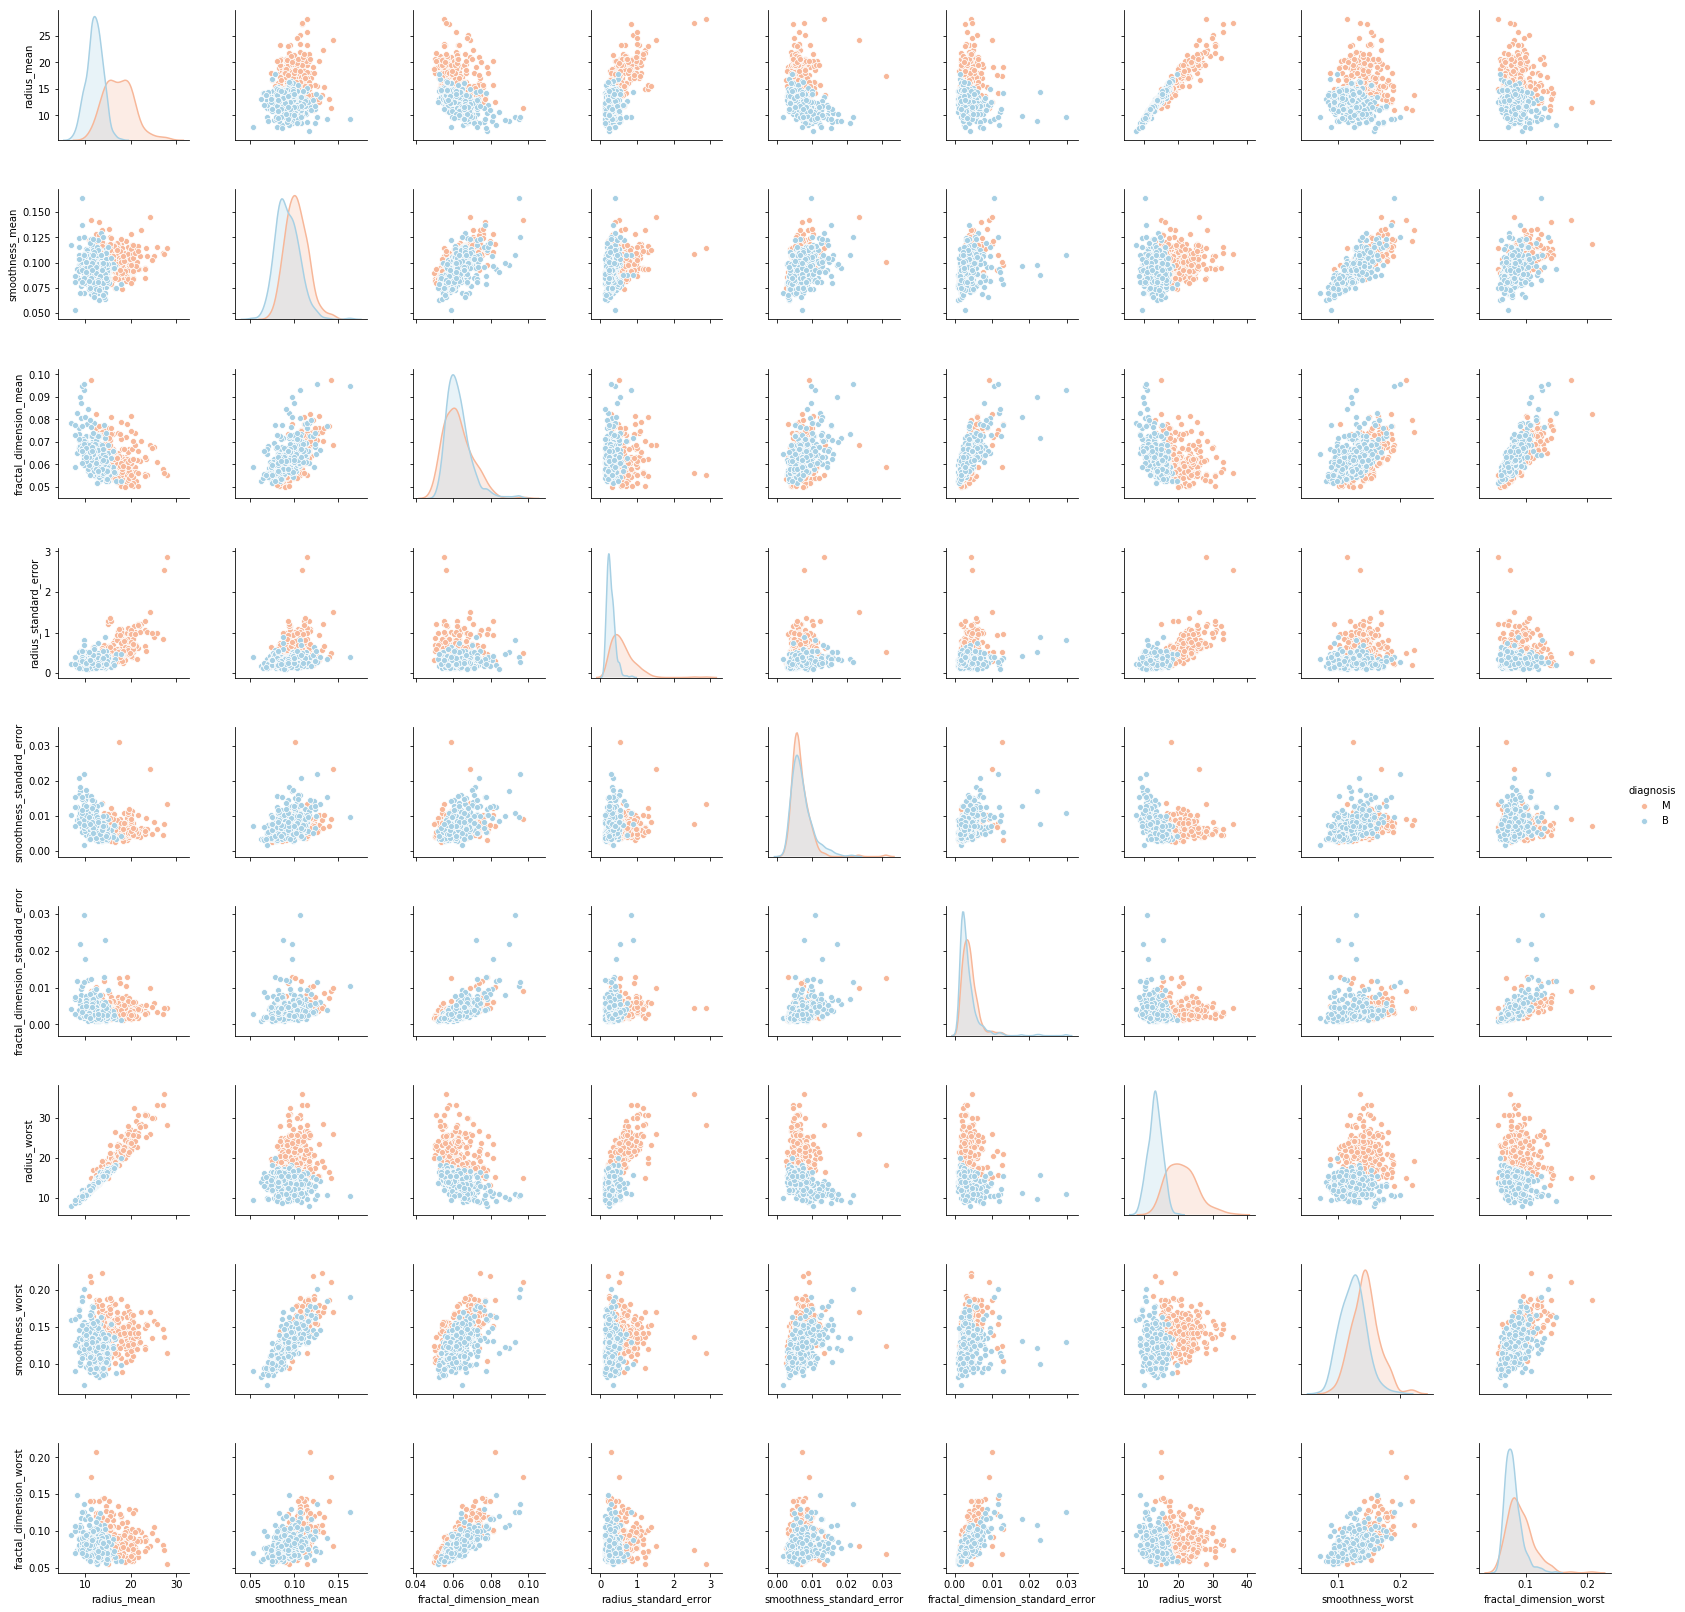

In [14]:
select_cols = [
    'radius_mean',
    'texture_mean',
    'smoothness_mean',
    'compactness_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

measurement_types = [
    'mean',
    'standard_error',
    'worst'
]

sample_cols = [
    'radius',
    'smoothness',
    'fractal_dimension'
]

correlation_cols = []
correlation_cols.append('diagnosis')
for measurement in measurement_types:
    for col in sample_cols:
        correlation_cols.append('_'.join([col, measurement])) 
# print(data)
# print(correlation_cols)
correlation_data = data[correlation_cols]
sns.pairplot(data=correlation_data, hue='diagnosis', palette='RdBu')

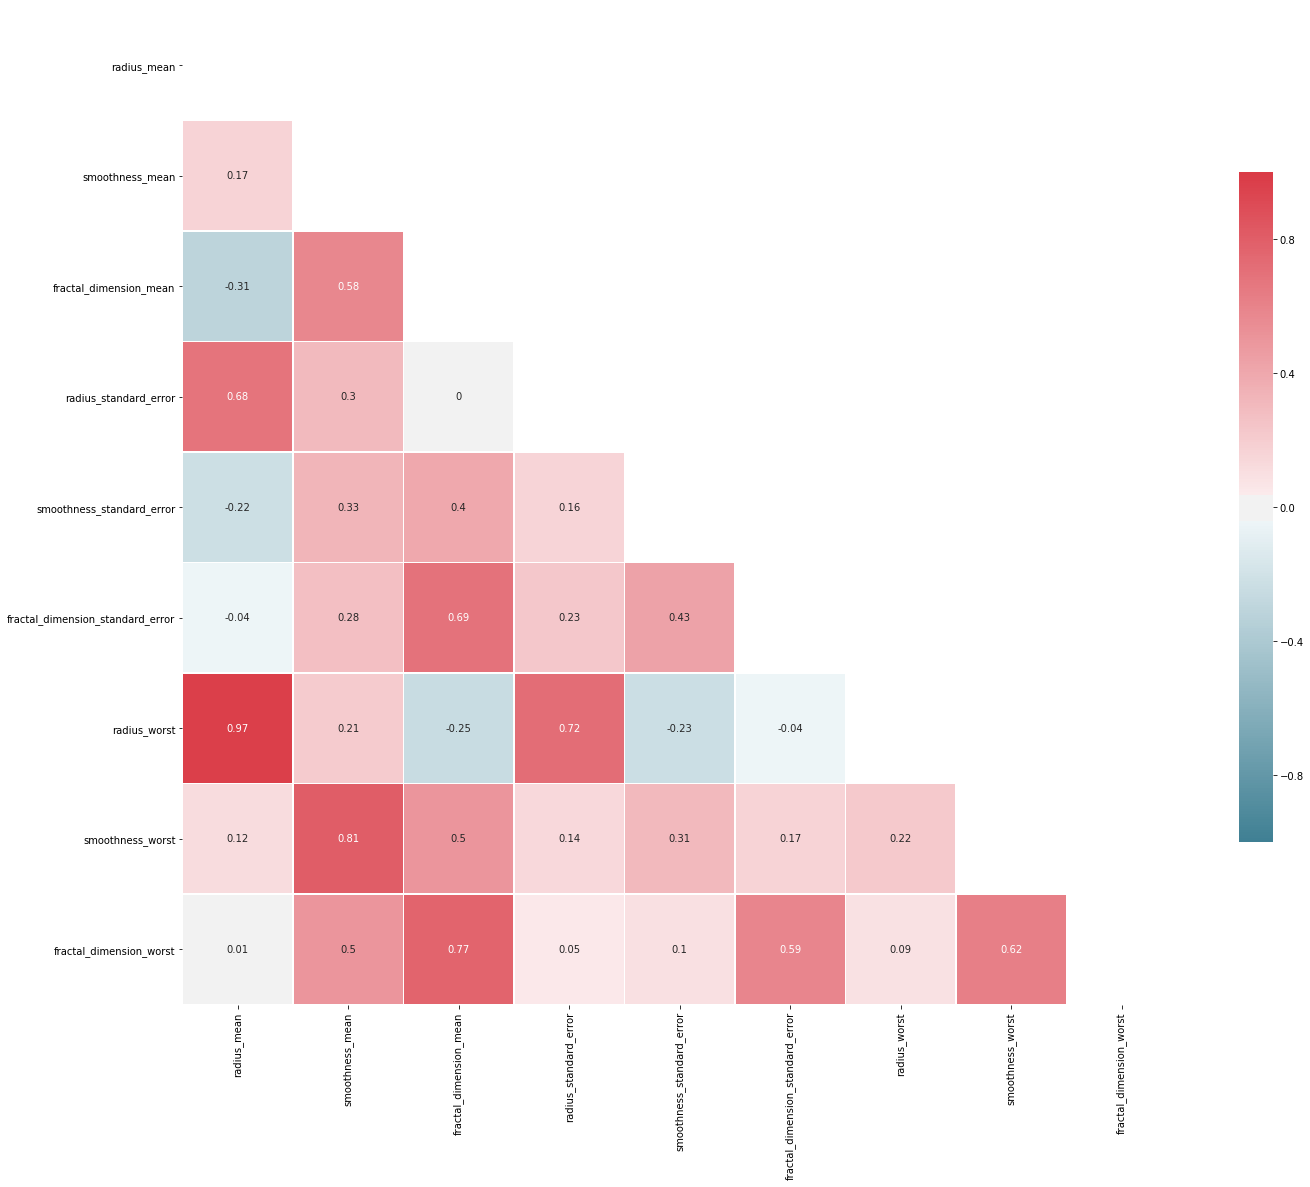

In [17]:
# Generate and visualize the correlation matrix
corr = correlation_data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

all corrs above 0.7 are between mean and worst, drop those. final set is 
    'radius',
    'texture',
    'smoothness',
    'compactness',
    'symmetry',
    'fractal_dimension'
for se and mean

In [ ]:
#create selected columns, filter data set
# train test validate split
#save to files as train test validate
